# Figures for Paquin et al. (Scientific Data)

Author: Christopher McCray<br>
Date: April 8, 2025

This notebook contains the functions to produce the figures for Paquin et al. (submitted to Scientific Data)

Figures are produced using files containing monthly, seasonal and annual statistics of key variables from CRCM5 simulations and ERA5 reanalysis. Files are organized in an [xscen](https://xscen.readthedocs.io/en/latest/index.html) catalog which is read to select and open the files for each analysis. These files can be downloaded from the [CRCM5-CMIP6 Zenodo repository](https://zenodo.org/records/14008072) and must be placed in local directory 'sim_stats' for the code to run properly.

Necessary Python packages can be installed using the included Conda environment (environment.yaml)

In [1]:
import os
from pathlib import Path
import xarray as xr
import xscen as xs
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
%matplotlib inline

/usr/local/DEV/mambaforge/envs/xscen-0.10/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


## Open catalog of validation files and set key parameters

In [3]:
#Catalog containing statistics files
cat_fi = 'validation-crcm5-catalog.json'
cat = xs.DataCatalog(cat_fi)

# For saving figures
save_figs = False
if save_figs:
    from pathlib import Path
    fig_dir = Path('figures/')
    fig_dir.mkdir(parents=True, exist_ok=True)


## Figure 2: compare CRCM5 driven by ERA5 with ERA5

In [4]:
mrcc5_ou_pilote = 'MRCC5'
periode_past=[1981,2000]
date_start = f'{periode_past[0]}-01-01'
date_end = f'{periode_past[-1]}-12-31'
ds_sim_1 = cat.search(type = 'RCM',
                        driving_model ='ECMWF-ERA5',                       
                       date_start=date_start,
                        date_end = date_end,
                     processing_level = 'moy-mens-sais').to_dask().load()
ds_obs = cat.search(type = 'reconstruction',
                            source='ERA5', 
                            domain = ds_sim_1.attrs['cat:domain'],
                            date_start=date_start,
                            date_end = date_end).to_dask().load()

/usr/local/DEV/mambaforge/envs/xscen-0.10/lib/python3.12/site-packages/pyproj/crs/crs.py:350: UserWarning: pyproj unable to set PROJ database path.


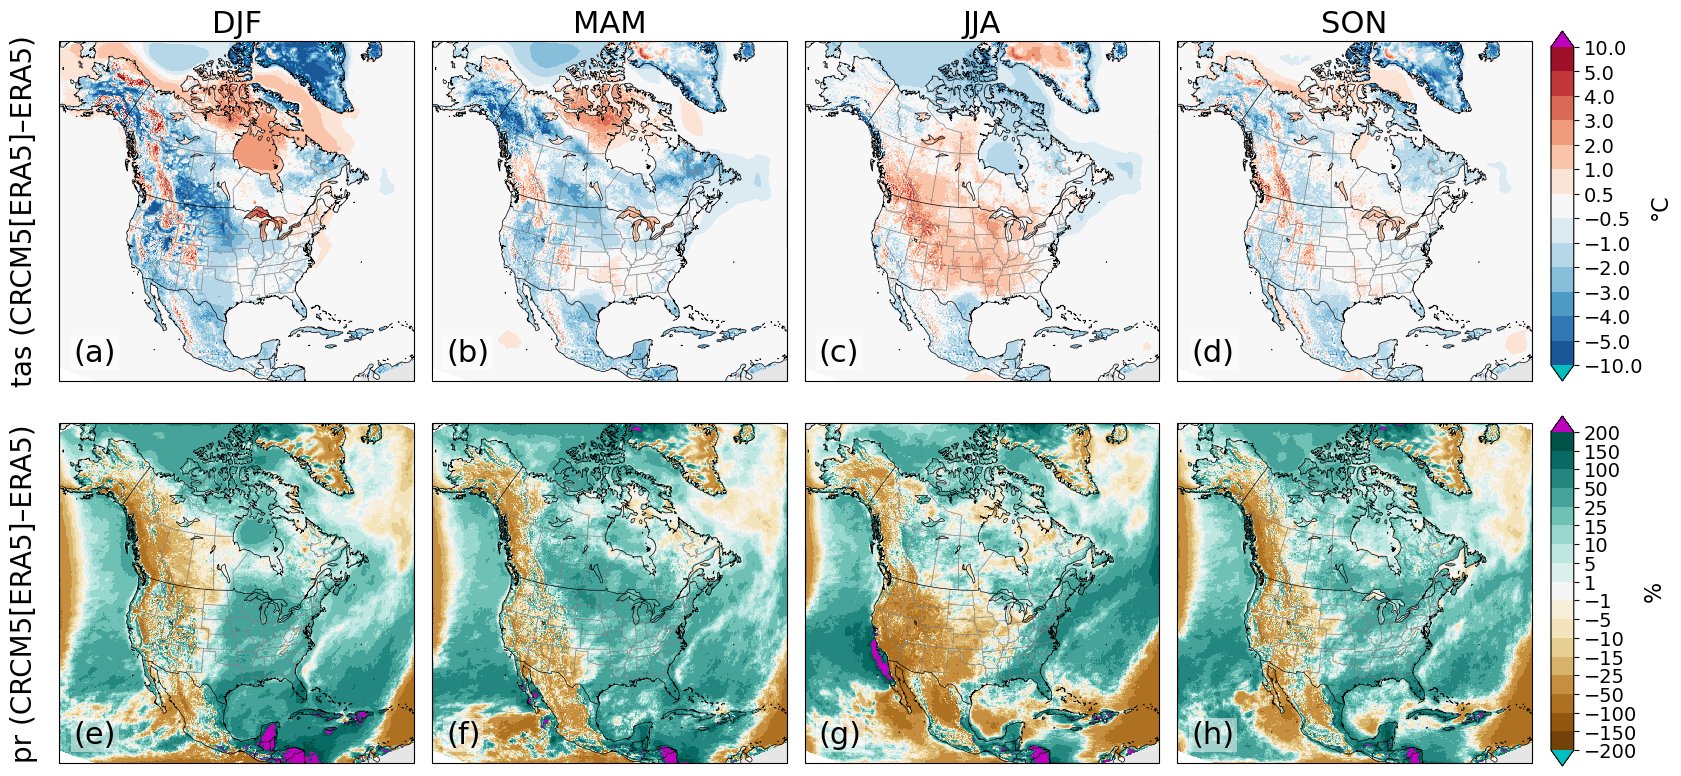

In [5]:
from validation_figures import cartes_differences_sim_ref_8panels

img_format = 'jpg'
fig_fname = f'validation_evaluation_crcm5_era5_pr-rel.{img_format}'
fig, axs = cartes_differences_sim_ref_8panels('sim-obs', 
                                              ds_obs, 
                                              ds_sim_1, 
                                              'tas_moy_sais', 
                                              'pr_moy_sais', 
                                              abs_rel_pr='rel', 
                                              title=False)
if save_figs:
    fig.savefig(os.path.join(fig_dir,fig_fname), dpi=300, bbox_inches='tight', format=img_format)
plt.show()

## Figures 3-4: compare CRCM5 historical simulations with ERA5

CanESM5
Obs trouvée, ajoutée à la liste
--SIMULATION ssp126 - TROUVÉE---
--SIMULATION ssp370 - TROUVÉE---
CNRM-ESM2-1
Obs trouvée, ajoutée à la liste
--SIMULATION ssp126 - TROUVÉE---
--SIMULATION ssp370 - TROUVÉE---
MPI-ESM1-2-LR
Obs trouvée, ajoutée à la liste
--SIMULATION ssp126 - TROUVÉE---
--SIMULATION ssp370 - TROUVÉE---
NorESM2-MM
Obs trouvée, ajoutée à la liste
--SIMULATION ssp126 - TROUVÉE---
--SIMULATION ssp370 - TROUVÉE---


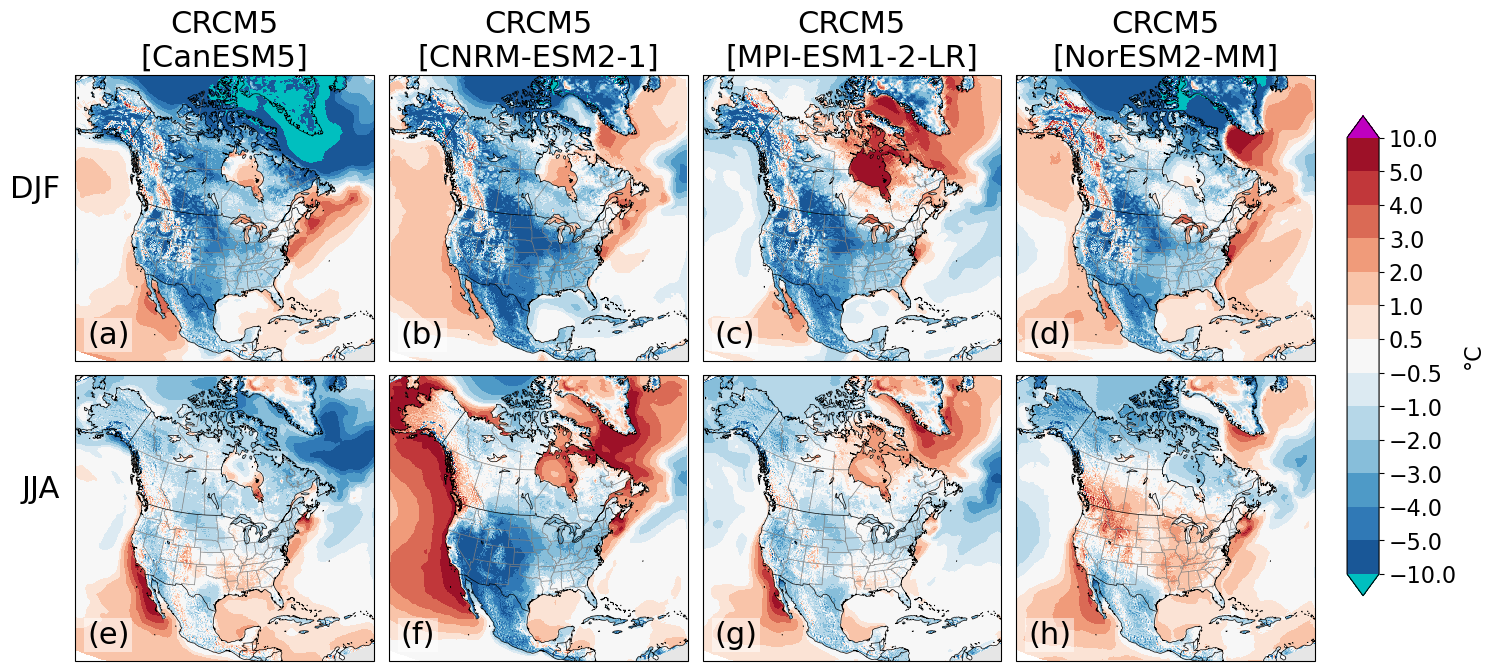

CanESM5
Obs trouvée, ajoutée à la liste
--SIMULATION ssp126 - TROUVÉE---
--SIMULATION ssp370 - TROUVÉE---
CNRM-ESM2-1
Obs trouvée, ajoutée à la liste
--SIMULATION ssp126 - TROUVÉE---
--SIMULATION ssp370 - TROUVÉE---
MPI-ESM1-2-LR
Obs trouvée, ajoutée à la liste
--SIMULATION ssp126 - TROUVÉE---
--SIMULATION ssp370 - TROUVÉE---
NorESM2-MM
Obs trouvée, ajoutée à la liste
--SIMULATION ssp126 - TROUVÉE---
--SIMULATION ssp370 - TROUVÉE---


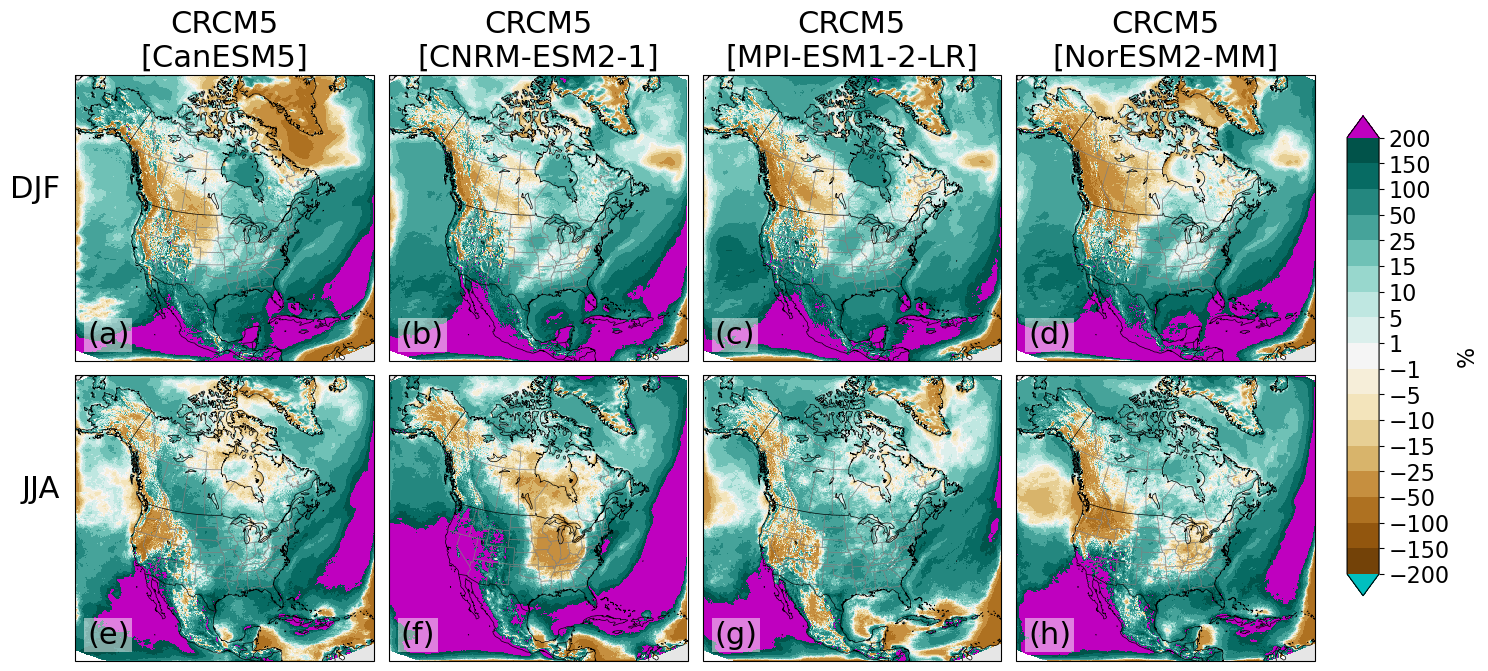

In [6]:
from validation_figures import postage_fig, get_variable_props, get_past_fut_mrcc5_pilote
import string
import cartopy.crs as ccrs

# Alphabet list for subplot labels
letters = list(string.ascii_lowercase)

sns.reset_orig()

type_plot = 'valid'
regrid_pilote=True
liste_pilotes = ['CanESM5','CNRM-ESM2-1', 'MPI-ESM1-2-LR', 'NorESM2-MM'] # CMIP6

# Modify the seasons list to include only DJF and JJA
seasons = ['DJF', 'JJA']
fontsize = 22
fr_en = 'en'
mrcc5_ou_pilote = 'mrcc5'
for nom_var in ['tas_moy_sais','pr_moy_sais']:
    if nom_var.startswith('pr'):
        abs_rel = 'rel'
    else:
        abs_rel = 'abs'

    # Set up a 2-row, 4-column plot
    fig, axs = postage_fig(2, 4, figsize=(16, 8), hspace=-0.05)
    n_let = 0   
    n_col = 0

    for pilote in liste_pilotes:
        print(pilote)
        n_row = 0
        plot_ax = axs[n_row, n_col]

        if mrcc5_ou_pilote == 'pilote':
            title = pilote
        else:
            title = f"CRCM5\n[{pilote}]" if fr_en == 'en' else f"MRCC5\n{pilote}"

        plot_ax.set_title(title, fontsize=fontsize)
        if pilote.startswith('ERA5'):
            periode_past = [1981, 2000]
        else:
            periode_past = [1971, 2000]

        ds_periods = get_past_fut_mrcc5_pilote(f".*{pilote}.*",
                                               periode_past=periode_past,
                                               pcat_fi = cat_fi,
                                               member = None,
                                               mrcc5_ou_pilote=mrcc5_ou_pilote,
                                               regrid_pilote=regrid_pilote,
                                               obs='ERA5')

        ds_obs = ds_periods[0]
        if ds_obs is not None:
            ds_past = ds_periods[1]
            ds_fut = ds_periods[2]

            ds_sim = ds_past if type_plot == 'valid' else ds_fut
            ds_ref = ds_obs if type_plot == 'valid' else ds_past

            if ds_sim is not None:
                da_diff = (ds_sim - ds_ref)[nom_var]    
                if abs_rel == 'rel':
                    da_diff = da_diff / ds_ref[nom_var] * 100

                for season in seasons:
                    plot_ax = axs[n_row, n_col]    

                    if n_col == 0:
                        plot_ax.text(-0.05, 0.55, f"{season}", va='bottom', ha='right',
                                     rotation='horizontal', rotation_mode='anchor', fontsize=fontsize,
                                     transform=plot_ax.transAxes)

                    da_diff_season = da_diff.sel(season=season)

                    da_diff_season, cmap, bounds, norm, extend, units = get_variable_props(nom_var=nom_var, 
                                                                                          da_var=da_diff_season, 
                                                                                          vals_diff='diff',
                                                                                          abs_rel=abs_rel,
                                                                                          fr_en=fr_en) 

                    cf = plot_ax.pcolormesh(da_diff_season.lon, 
                                            da_diff_season.lat, 
                                            da_diff_season, 
                                            cmap=cmap, 
                                            norm=norm, 
                                            transform=ccrs.PlateCarree(), zorder=4)

                    letter_label = "(" + letters[n_row * 4 + n_col] + ")"
                    plot_ax.text(0.04, 0.04, letter_label, transform=plot_ax.transAxes,
                                 fontsize=fontsize, ha='left', va='bottom', zorder=999,
                                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.5, pad=2))

                    n_row += 1

        n_col += 1

    cbar_ax = fig.add_axes([0.92, 0.21, 0.02, 0.6]) 
    cb = fig.colorbar(cf, cax=cbar_ax, extend=extend, ticks=bounds)
    cb.ax.tick_params(labelsize=fontsize-6)
    cb.set_label(units, fontsize=fontsize-6)     

    fig_fname = f"{type_plot}_{nom_var}_{abs_rel}_{mrcc5_ou_pilote}_DJF_JJA_{periode_past[0]}-{periode_past[1]}.png"
    if save_figs:
        fig.savefig(os.path.join(fig_dir,fig_fname), bbox_inches='tight')
    plt.show()


## Figure 5: Boxplots and seasonal cycles

In [7]:
pilote = 'MPI-M-MPI-ESM1-2-LR'
member = 'r1i1p1f1' 

experiments=['ssp126','ssp245','ssp370']


period_past=[1971,2000]
period_fut=[2071,2100]

###### Données pour toutes les simulations pilotées 'pilote'
ds_out = get_past_fut_mrcc5_pilote(pilote = pilote, 
                       periode_past=period_past,
                       periode_fut=period_fut,
                       member = member,
                       pcat_fi=cat_fi, 
                       mrcc5_ou_pilote = 'MRCC5',
                       region = None,
                       output_ssps = experiments,
                       regrid_pilote = True,
                       obs = 'ERA5')
ds_obs, ds_past, ds_fut_ssp126, ds_fut_ssp245, ds_fut_ssp370 = ds_out 



Obs trouvée, ajoutée à la liste
--SIMULATION ssp126 - TROUVÉE---
--SIMULATION ssp245 - TROUVÉE---
--SIMULATION ssp370 - TROUVÉE---


ERROR 1: PROJ: proj_create_from_database: /exec/cmccray/pynew/share/proj/proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 2 whereas a number >= 4 is expected. It comes from another PROJ installation.
/exec/cmccray/python/validation/data_paper/validation_code_crcm5/validation_figures.py:522: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
/exec/cmccray/python/validation/data_paper/validation_code_crcm5/validation_figures.py:522: UserWarning: The palette list has more values (15) than needed (5), which may not be intended.
/exec/cmccray/python/validation/data_paper/validation_code_crcm5/validation_figures.py:522: UserWarning: The palette list has more values (20) than needed (5), which may not be intended.


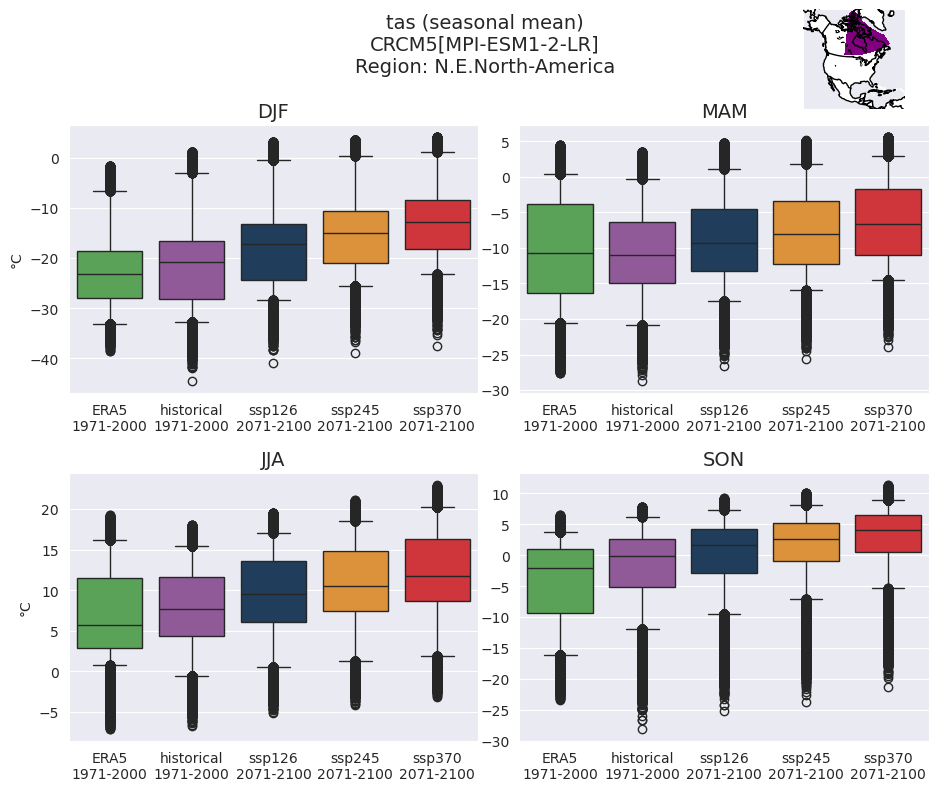

In [8]:
from validation_figures import boxplots_saisons
import pyproj
import sys
pyproj.datadir.set_data_dir(f'{sys.prefix}/share/proj')

label_attr = 'experiment'

# IPCC REGIONS >>>>>
#ipcc_regs = ['GIC','NWN','NEN','WNA', 'CNA', 'ENA','NCA','SCA','CAR'] #regions dans le domaine AMNO
ipcc_regs = ['NEN'] 

ipcc_regions = gpd.read_file('ipcc-wg1-regions/IPCC-WGI-reference-regions-v4.shp')
if ipcc_regs: 
    ipcc_regions = ipcc_regions[ipcc_regions.Acronym.isin(ipcc_regs)]
    
for idx, row in ipcc_regions.iterrows():
    output_files = []
    region_name = row['Name']    
    region = ipcc_regions[ipcc_regions.Name==region_name]
    
    for nom_var in ['tas_moy_sais']:    
        ds_compare_list = [ds_obs.copy(), ds_past.copy(), ds_fut_ssp126.copy(),ds_fut_ssp245.copy(), ds_fut_ssp370.copy()]
     
        fig, axs = boxplots_saisons(nom_var = nom_var, 
                                    ds_list = ds_compare_list, 
                                    region = region, 
                                    region_name=region_name, 
                                    box_ou_violin = 'box', 
                                    fr_en=fr_en, 
                                    label_attr=label_attr)
        if save_figs:
            fig_fname = f"boxplots_MRCC5-{ds_compare_list[1].attrs['driving_model_id'].strip()}_{row['Acronym']}_{nom_var}.png"
            fig.savefig(os.path.join(fig_dir,fig_fname), bbox_inches='tight')
        plt.show()

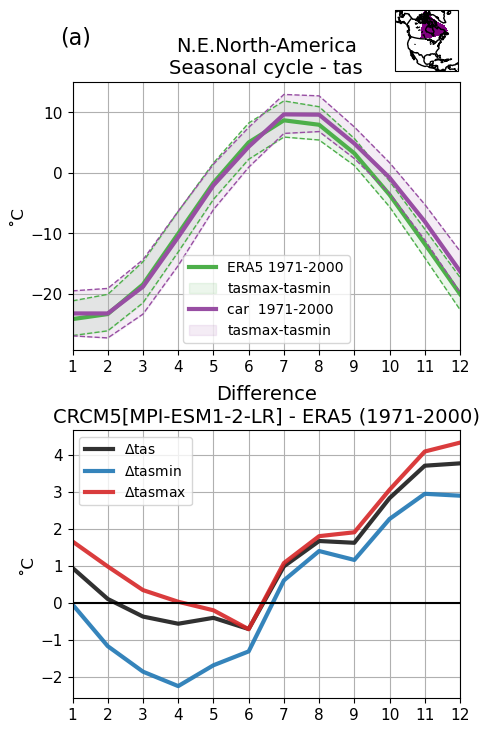

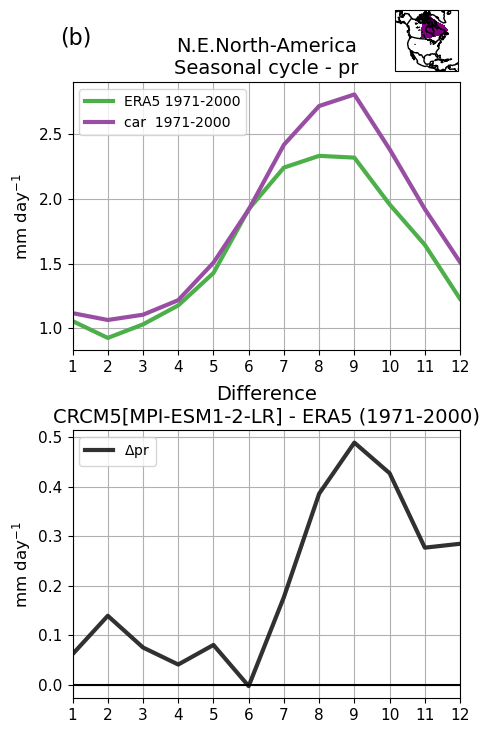

In [9]:
from validation_figures import affiche_cycle_annuel
import subprocess

sns.reset_defaults()
nom_vars = ['tas','pr']
ipcc_regs = ['NEN'] 
ds_source = ds_past.copy()
ds_ref = ds_obs.copy()

ipcc_regions = gpd.read_file('ipcc-wg1-regions/IPCC-WGI-reference-regions-v4.shp')
label_attr = 'driving_model'
if ipcc_regs: 
    ipcc_regions = ipcc_regions[ipcc_regions.Acronym.isin(ipcc_regs)]


for idx, row in ipcc_regions.iterrows():
    output_files = []
    region_name = row['Name']    
    region = ipcc_regions[ipcc_regions.Name==region_name]
    
    for i, nom_var in enumerate(nom_vars):
        fig = affiche_cycle_annuel(ds_ref = ds_ref, 
                             ds_source = ds_source,
                             nom_var = nom_var,
                             region = region,
                             nom_region = region_name, 
                               fr_en=fr_en,
                               label_attr=label_attr,
                             )
        if i == 0:
            fig.text(0.1, 0.95, '(a)', fontsize=16, ha='left', va='top')
        elif i == 1:
            fig.text(0.1, 0.95, '(b)', fontsize=16, ha='left', va='top')

        if save_figs:
            fig_fname = f"{region['Acronym'].values[0]}_{nom_var}.png"
            fig_path = os.path.join(fig_dir,fig_fname)
            fig.savefig(fig_path,  bbox_inches='tight')
            output_files.append(fig_path)
        plt.show()
        plt.close(fig) 
    if save_figs:    
        # Define the output image name
        if 'cat:code' in ds_source.attrs:
            source_label = ds_source.attrs['cat:code']
        else:
            source_label = ds_source.attrs['cat:source']
        if 'cat:code' in ds_ref.attrs:
            ref_label = ds_ref.attrs['cat:code']
        else:
            ref_label = ds_ref.attrs['cat:source']

        fig_fname = f"cycle_annuel_{source_label}_vs_{ref_label}_region_{region['Acronym'].values[0]}.png"        
        combined_image_path = os.path.join(fig_dir,fig_fname)

        # Combine the PNGs into one image side by side
        convert_command = ["convert"] + output_files + ["+append", combined_image_path]
        subprocess.run(convert_command)
        # Remove the individual files 
        for file in output_files:
            os.remove(file)

        print(f"Combined image saved as {combined_image_path}")

## Figure 6-7: Climate change signal

CanESM5
Obs trouvée, ajoutée à la liste
--SIMULATION ssp370 - TROUVÉE---
CNRM-ESM2-1
Obs trouvée, ajoutée à la liste
--SIMULATION ssp370 - TROUVÉE---
MPI-ESM1-2-LR
Obs trouvée, ajoutée à la liste
--SIMULATION ssp370 - TROUVÉE---
NorESM2-MM
Obs trouvée, ajoutée à la liste
--SIMULATION ssp370 - TROUVÉE---


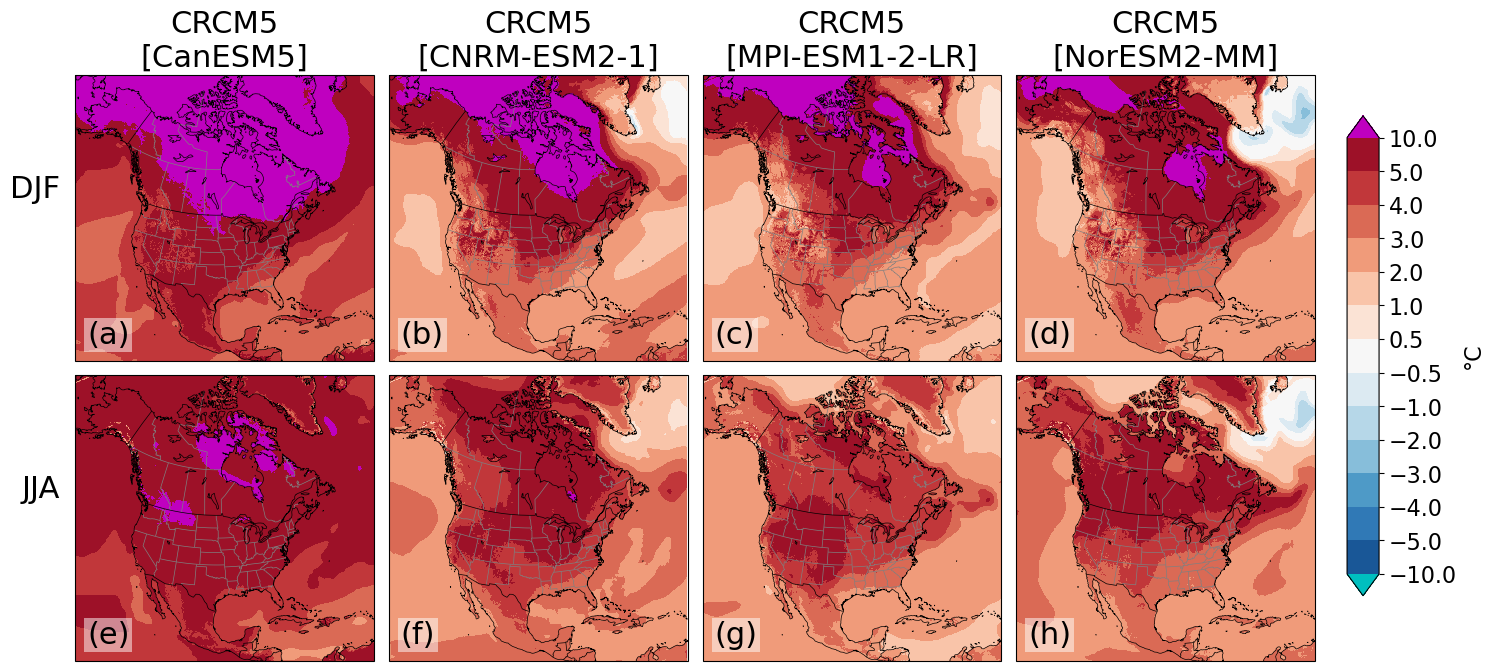

CanESM5
Obs trouvée, ajoutée à la liste
--SIMULATION ssp370 - TROUVÉE---
CNRM-ESM2-1
Obs trouvée, ajoutée à la liste
--SIMULATION ssp370 - TROUVÉE---
MPI-ESM1-2-LR
Obs trouvée, ajoutée à la liste
--SIMULATION ssp370 - TROUVÉE---
NorESM2-MM
Obs trouvée, ajoutée à la liste
--SIMULATION ssp370 - TROUVÉE---


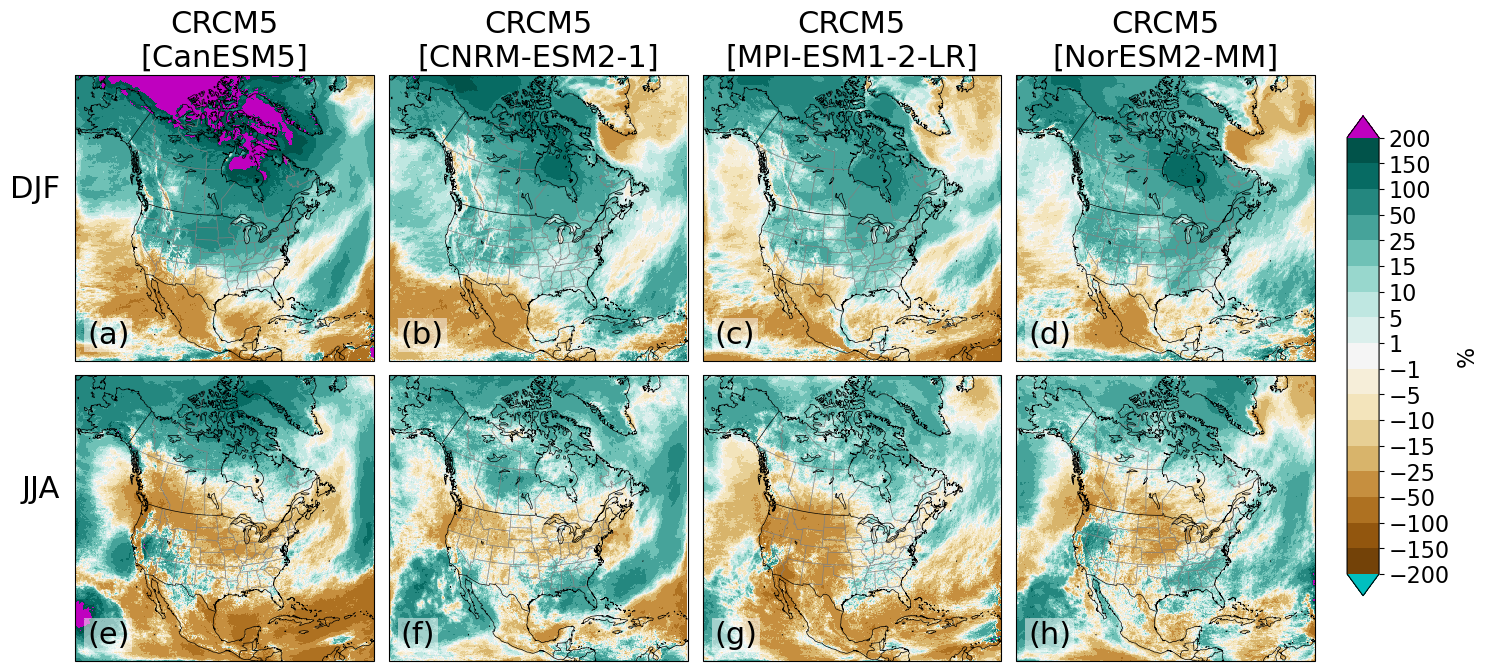

In [13]:
from validation_figures import postage_fig
# Alphabet list for subplot labels
letters = list(string.ascii_lowercase)

sns.reset_orig()

type_plot = 'c-c'
regrid_pilote=True
liste_pilotes = ['CanESM5','CNRM-ESM2-1', 'MPI-ESM1-2-LR', 'NorESM2-MM'] # CMIP6
ssp = 'ssp370'
periode_fut = [2071,2100]
periode_past = [1971, 2000]

# Modify the seasons list to include only DJF and JJA
seasons = ['DJF', 'JJA']
fontsize = 22
fr_en = 'en'

for mrcc5_ou_pilote in ['mrcc5']:
    for nom_var in ['tas_moy_sais','pr_moy_sais', ]:
        if nom_var.startswith('pr'):
            abs_rel = 'rel'
        else:
            abs_rel = 'abs'
        
        # Set up a 2-row, 4-column plot
        fig, axs = postage_fig(2, 4, figsize=(16, 8), hspace=-0.05)
        n_let = 0   
        n_col = 0
        
        for pilote in liste_pilotes:
            print(pilote)
            n_row = 0
            plot_ax = axs[n_row, n_col]
            
            if mrcc5_ou_pilote == 'pilote':
                title = pilote
            else:
                title = f"CRCM5\n[{pilote}]" if fr_en == 'en' else f"MRCC5\n{pilote}"
            
            plot_ax.set_title(title, fontsize=fontsize)

            ds_periods = get_past_fut_mrcc5_pilote(f".*{pilote}.*",
                                                   periode_past=periode_past,
                                                   periode_fut=periode_fut, 
                                                   pcat_fi = cat_fi,
                                                   member = None,
                                                   mrcc5_ou_pilote=mrcc5_ou_pilote,
                                                   regrid_pilote=regrid_pilote,
                                                   output_ssps=[ssp],
                                                   obs='ERA5')

            ds_obs = ds_periods[0]
            if ds_obs is not None:
                ds_past = ds_periods[1]
                ds_fut = ds_periods[2]

                ds_sim = ds_past if type_plot == 'valid' else ds_fut
                ds_ref = ds_obs if type_plot == 'valid' else ds_past

                if ds_sim is not None:
                    da_diff = (ds_sim - ds_ref)[nom_var]    
                    if abs_rel == 'rel':
                        da_diff = da_diff / ds_ref[nom_var] * 100

                    for season in seasons:
                        plot_ax = axs[n_row, n_col]    
                        
                        if n_col == 0:
                            plot_ax.text(-0.05, 0.55, f"{season}", va='bottom', ha='right',
                                         rotation='horizontal', rotation_mode='anchor', fontsize=fontsize,
                                         transform=plot_ax.transAxes)

                        da_diff_season = da_diff.sel(season=season)

                        da_diff_season, cmap, bounds, norm, extend, units = get_variable_props(nom_var=nom_var, 
                                                                                              da_var=da_diff_season, 
                                                                                              vals_diff='diff',
                                                                                              abs_rel=abs_rel,
                                                                                              fr_en=fr_en) 

                        cf = plot_ax.pcolormesh(da_diff_season.lon, 
                                                da_diff_season.lat, 
                                                da_diff_season, 
                                                cmap=cmap, 
                                                norm=norm, 
                                                transform=ccrs.PlateCarree(), zorder=4)

                        letter_label = "(" + letters[n_row * 4 + n_col] + ")"
                        plot_ax.text(0.04, 0.04, letter_label, transform=plot_ax.transAxes,
                                     fontsize=fontsize, ha='left', va='bottom', zorder=999,
                                     bbox=dict(facecolor='white', edgecolor='none', alpha=0.5, pad=2))

                        n_row += 1

            n_col += 1

        cbar_ax = fig.add_axes([0.92, 0.21, 0.02, 0.6]) 
        cb = fig.colorbar(cf, cax=cbar_ax, extend=extend, ticks=bounds)
        cb.ax.tick_params(labelsize=fontsize-6)
        cb.set_label(units, fontsize=fontsize-6)     
        if save_figs:
            fig_fname = f"{type_plot}_{nom_var}_{abs_rel}_{mrcc5_ou_pilote}_DJF_JJA_{periode_past[0]}-{periode_past[1]}.png"
            fig.savefig(os.path.join(fig_dir,fig_fname), bbox_inches='tight')
        plt.show()


## Figure 8: $\Delta$T/$\Delta$P plots

In [11]:
from validation_figures import cos_weight_mean
import pyproj
import sys
pyproj.datadir.set_data_dir(f'{sys.prefix}/share/proj')

reg_acronym = 'NEN'
ipcc_regions = gpd.read_file('ipcc-wg1-regions/IPCC-WGI-reference-regions-v4.shp')
region = ipcc_regions[ipcc_regions.Acronym == reg_acronym]

deltas = pd.DataFrame(columns = ['DP','DT'])

#months = [12,1,2]
#months = [6,7,8]
months = False
ssps = ['ssp126','ssp245','ssp370', 'ssp585']
liste_pilotes = ['CanESM5','CNRM-ESM2-1', 'MPI-ESM1-2-LR', 'NorESM2-MM'] 

#ssps = ['rcp45','rcp85']
#liste_pilotes = ['CanESM2','CNRM-CM5',  'MPI-ESM-LR', 'GFDL-ESM2M'] # CMIP5
#liste_pilotes = ['CanESM2'] # CMIP5

periode_futs = [2, [2071,2100]]
periode_past=[1971,2000]
mrcc5_pilote = ['MRCC5']
# = [[2071, 2100]]
#mrcc5_pilote = ['MRCC5']

df_index = 0
for periode_fut in periode_futs:
    for pilote in liste_pilotes:
        for mrcc5_ou_pilote in mrcc5_pilote:           
            print(mrcc5_ou_pilote, pilote)
            with xr.set_options(keep_attrs=True): 
                ds_periods = get_past_fut_mrcc5_pilote(f'.*{pilote}.*', 
                               periode_past=[1971,2000],
                               periode_fut=periode_fut,
                               pcat_fi=cat_fi, 
                               mrcc5_ou_pilote = mrcc5_ou_pilote,
                               region = region,
                               output_ssps = ssps,
                               months=months)


                ds_sim_past = ds_periods[0]
                if ds_sim_past is not None:              
                    print(df_index)
                    if mrcc5_ou_pilote == 'MRCC5':                
                        #pilote = ds_sim_past.attrs['cat:driving_model']                
                        index_name = f'MRCC5[{pilote}]'
                        mean_dims = ['rlat', 'rlon']
                    else:             
                        #pilote = ds_sim_past.attrs['cat:source']
                        index_name = pilote
                        mean_dims = ['lat', 'lon']
                        #mean_dims = ['rlat', 'rlon']

                    for n_ssp, ssp in enumerate(ssps):
                        ds_ssp = ds_periods[n_ssp+1]
                        if ds_ssp:
                            if ( 'tas_moy' in ds_ssp.data_vars) and ( 'tas_moy' in ds_sim_past.data_vars):
                                print("Using moy")
                                ds_change = (ds_ssp - ds_sim_past)
                                ds_pct_change = ds_change/ds_sim_past * 100
                                pr_var = 'pr_moy'
                                tas_var = 'tas_moy'
                                
                            else:
                                ds_change = (ds_ssp - ds_sim_past).mean('month')
                                ds_pct_change = ds_change/ds_sim_past.mean('month') * 100
                                pr_var = 'pr_moy_mens'
                                tas_var = 'tas_moy_mens'
                            #ds_change = xr.where(ds_change.lat<=50, ds_change, np.nan)
                            ds_weighted_mean = cos_weight_mean(ds_change)
                            ds_weighted_mean_pct = cos_weight_mean(ds_pct_change)
                            experiment = ds_ssp.attrs['cat:experiment']

                            name = f"{index_name} ({experiment})"   
                            #print(deltas)
                            #print(df_index)
                            deltas.loc[df_index, 'nom'] = name                            
                            deltas.loc[df_index, 'pilote'] = pilote
                            deltas.loc[df_index, 'experiment'] = experiment
                            deltas.loc[df_index, 'periode_fut'] = str(periode_fut)
                            deltas.loc[df_index, 'type_sim'] = mrcc5_ou_pilote
                            
                            
                            deltas.loc[df_index, 'DP'] = ds_weighted_mean[pr_var].values * 86400
                            deltas.loc[df_index, 'DP_pct'] = ds_weighted_mean_pct[pr_var].values 
                            deltas.loc[df_index, 'DT'] = ds_weighted_mean[tas_var].values
                            
                            # deltas.loc[df_index, 'DP'] = xs.aggregate.spatial_mean(ds_change['pr_moy_mens'], method='mean',  
                            #                                                           kwargs = {'dim': mean_dims}).values * 86400
                            # deltas.loc[df_index, 'DT'] = xs.aggregate.spatial_mean(ds_change['tas_moy_mens'], method='mean',  
                            #                                                       kwargs = {'dim': mean_dims}).values 
                            #print(ds_weighted_mean)
                            df_index+=1

MRCC5 CanESM5
--SIMULATION ssp126 - TROUVÉE---
--SIMULATION ssp245 - TROUVÉE---
--SIMULATION ssp370 - TROUVÉE---
--SIMULATION ssp585 - TROUVÉE---
0
Using moy
cos-weight weighting with rlat
cos-weight weighting with rlat
Using moy
cos-weight weighting with rlat
cos-weight weighting with rlat
Using moy
cos-weight weighting with rlat
cos-weight weighting with rlat
Using moy
cos-weight weighting with rlat
cos-weight weighting with rlat
MRCC5 CNRM-ESM2-1
--SIMULATION ssp126 - DONNÉES MANQUANTES---
--SIMULATION ssp245 - TROUVÉE---
--SIMULATION ssp370 - TROUVÉE---
--SIMULATION ssp585 - DONNÉES MANQUANTES---
4
Using moy
cos-weight weighting with rlat
cos-weight weighting with rlat
Using moy
cos-weight weighting with rlat
cos-weight weighting with rlat
MRCC5 MPI-ESM1-2-LR
--SIMULATION ssp126 - DONNÉES MANQUANTES---
--SIMULATION ssp245 - TROUVÉE---
--SIMULATION ssp370 - TROUVÉE---
--SIMULATION ssp585 - DONNÉES MANQUANTES---
6
Using moy
cos-weight weighting with rlat
cos-weight weighting with rla

/tmp/ipykernel_67671/2843438172.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_67671/2843438172.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


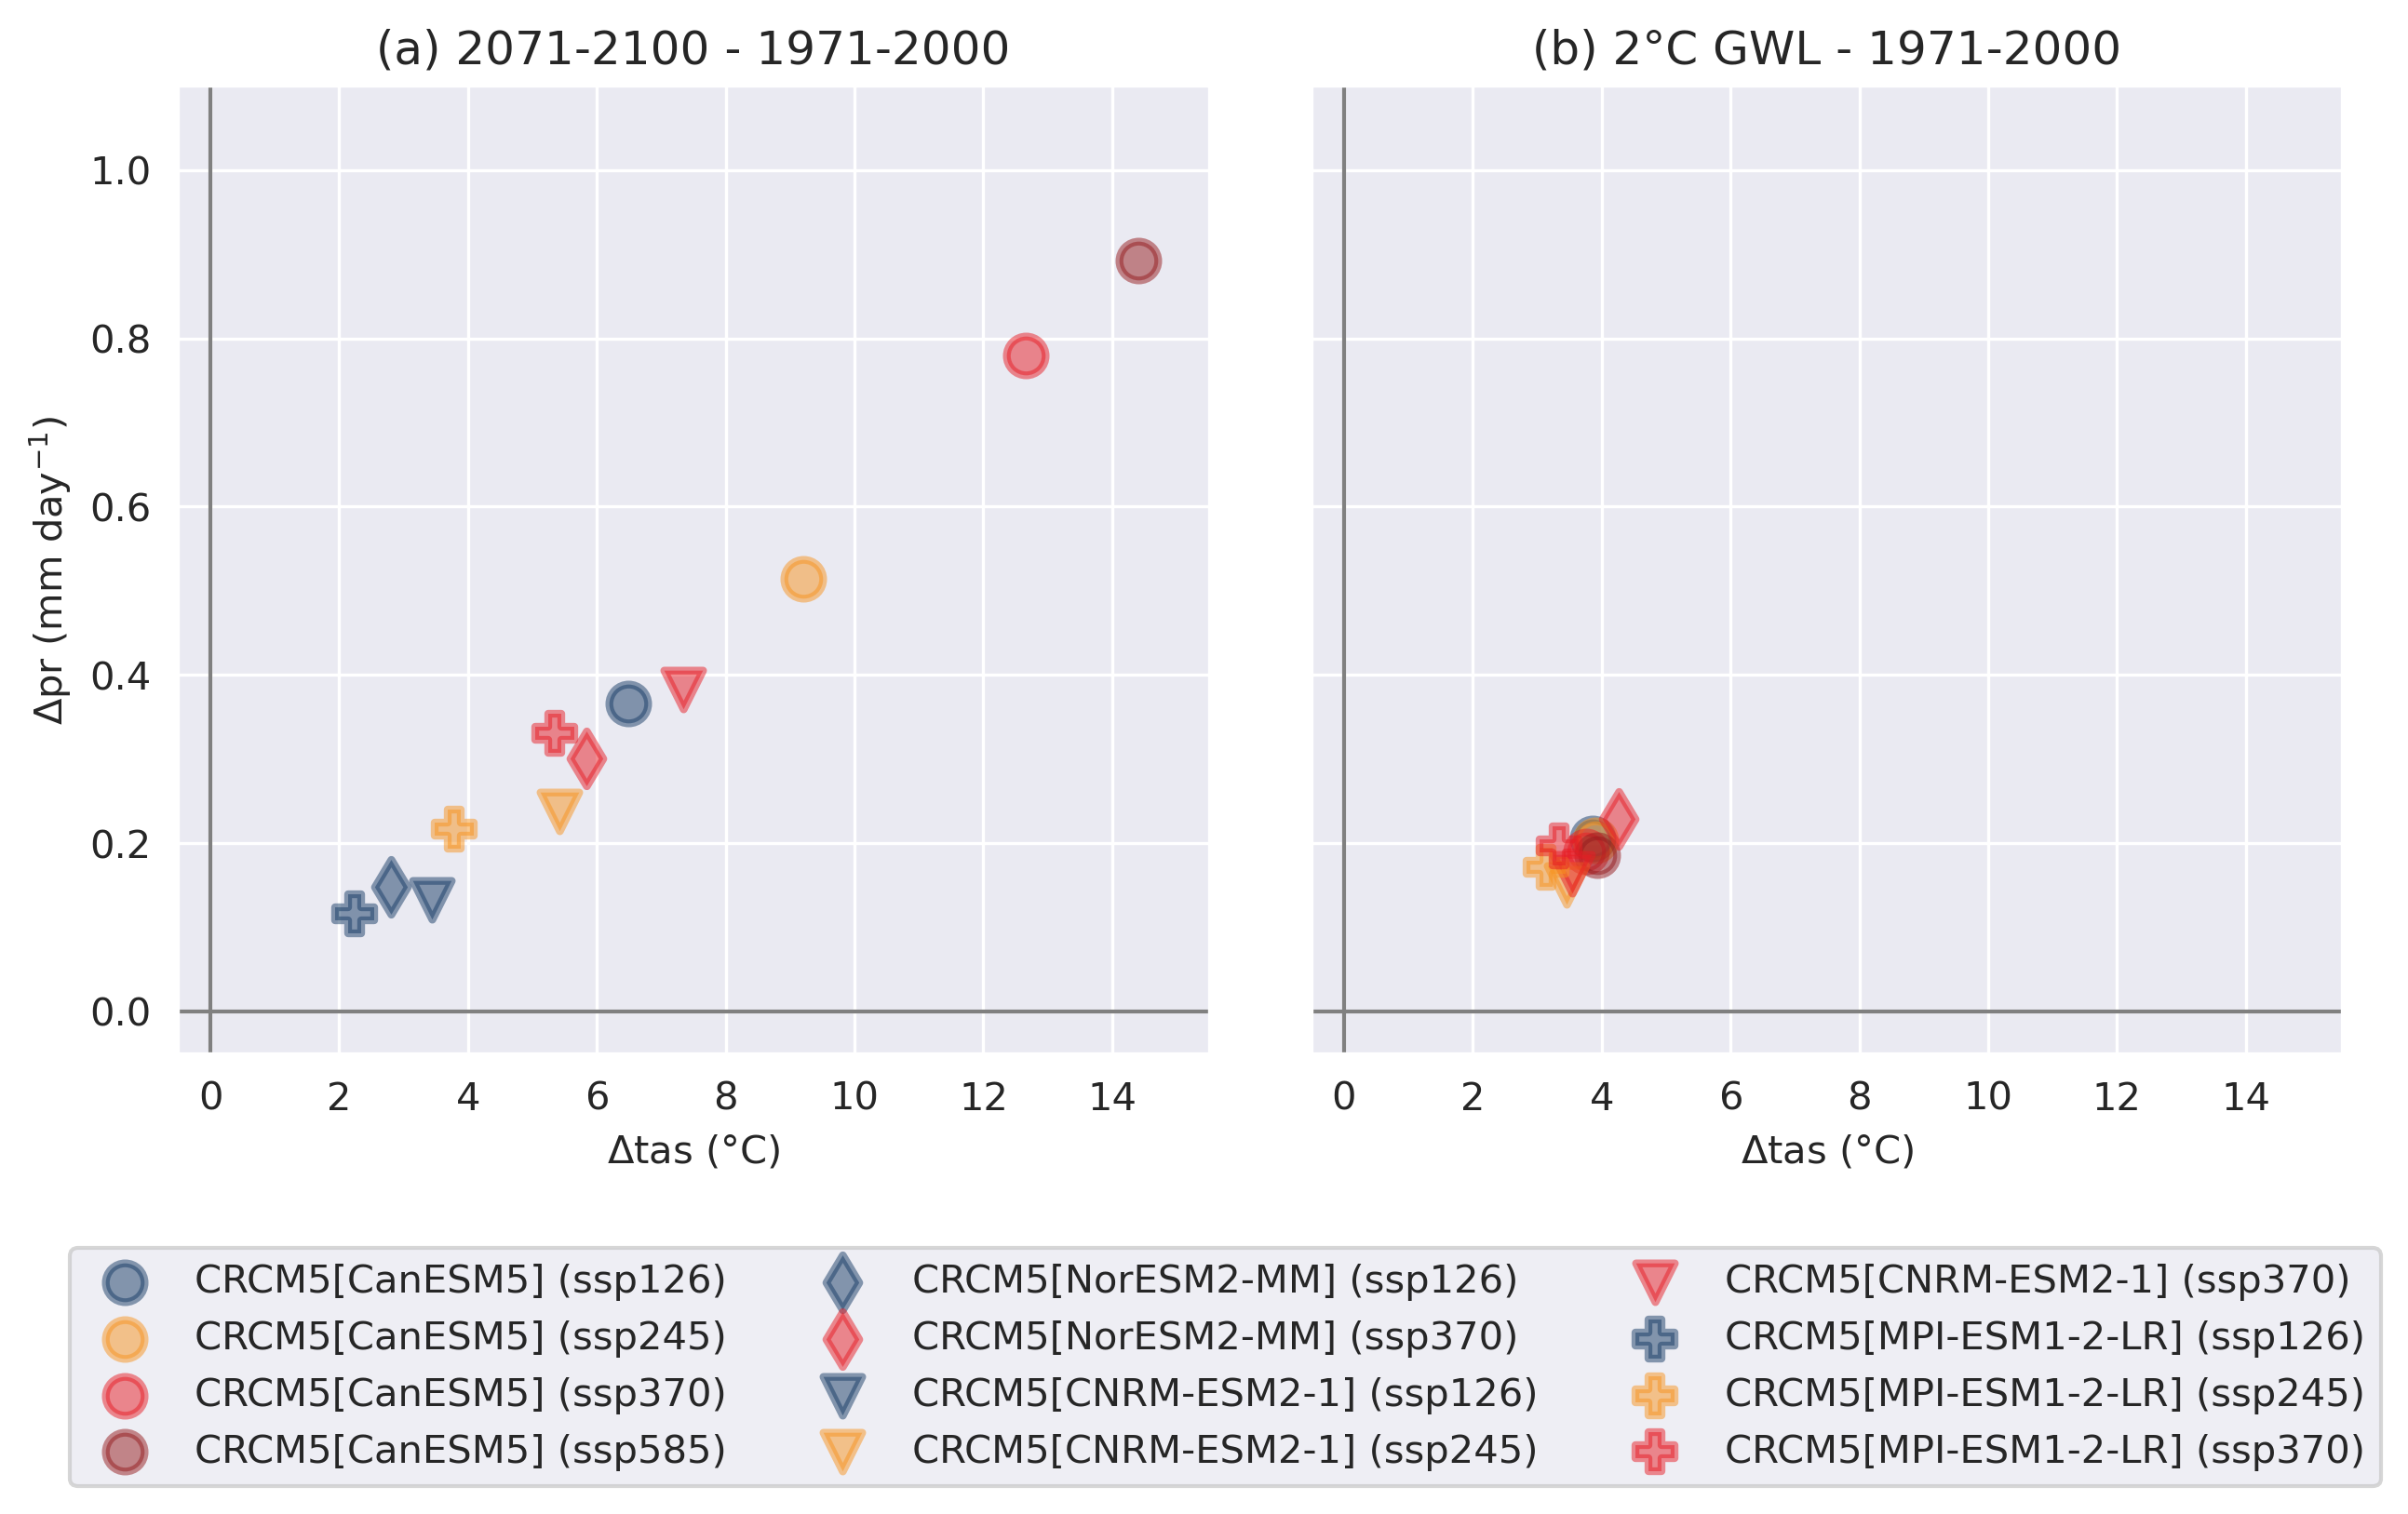

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style("darkgrid")

from validation_figures import colors_ipcc
def get_marker_props(pilote, experiment):
    if 'CanESM' in pilote:
        marker = "o"
    elif 'MPI' in pilote:
        marker = 'P'
    elif 'CNRM' in pilote:
        marker = 'v'
    elif 'NorESM' in pilote:
        marker = 'd'
    elif 'GFDL' in pilote:
        marker = 's'
    
    c = colors_ipcc(experiment)

    return marker, c

fr_en = 'en'
dp_abs_rel = 'abs'

# Mock data, assuming the deltas dataframe is loaded somewhere in your code
deltas_plot_1 = deltas[deltas.periode_fut == "[2071, 2100]"] # Replace with appropriate filtering
deltas_plot_2 = deltas[deltas.periode_fut == "2"] # Replace with appropriate filtering
deltas_plot_1['nom'] = deltas_plot_1['nom'].str.replace('MRCC5', 'CRCM5')
deltas_plot_2['nom'] = deltas_plot_2['nom'].str.replace('MRCC5', 'CRCM5')

    
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5), sharey=True)
plt.subplots_adjust(wspace=0.1)  # Decrease the value to reduce space

# Function to create a scatter plot
def create_scatter(ax, deltas_plot, title,  y_label=False):
    ax.axvline(0, color='gray', lw=1)
    ax.axhline(0, color='gray', lw=1)

    for idx, row in deltas_plot.iterrows():
        marker, c = get_marker_props(row['pilote'], row['experiment'])
        facecolors = c if row['type_sim'] == 'MRCC5' else 'none'
        edgecolors = c
        label = row['nom']
        
       
        if dp_abs_rel == 'abs':
            dp_var = 'DP'
        else:
            dp_var = 'DP_pct'
        ax.scatter(row['DT'], row[dp_var], marker=marker, label=label, s=100, alpha=0.5, 
                   facecolors=facecolors, edgecolors=edgecolors, lw=2)

    ax.set_xlabel(r'$\Delta$tas (°C)')
    if y_label:
        if dp_abs_rel == 'abs':
            ax.set_ylabel(r'$\Delta$pr (mm day$^{-1}$)')
        else:     
            ax.set_ylabel(r'$\Delta$pr (%)')
    #ax.set_xlim([-0.5, 9.5])
    #ax.set_ylim([-0.1, 0.61])
    ax.set_xlim([-.5,15.5])
    if dp_abs_rel == 'abs':
        ax.set_ylim(-.05,1.1)
    ax.set_title(title)

# Create the first scatter plot
create_scatter(ax1, deltas_plot_1, "(a) 2071-2100 - 1971-2000", y_label=True)

# Create the second scatter plot
create_scatter(ax2, deltas_plot_2, "(b) 2°C GWL - 1971-2000")

# Consolidate legend from both subplots
handles, labels = ax1.get_legend_handles_labels() 

# Sort handles and labels by driving model (e.g., "CanESM5", "CNRM", etc.)
canesm5_handles = []
cnrm_handles = []
mpi_handles = []
noresm_handles = []

canesm5_labels = []
cnrm_labels = []
mpi_labels = []
noresm_labels = []

for handle, label in zip(handles, labels):
    if "CanESM5" in label:
        canesm5_handles.append(handle)
        canesm5_labels.append(label)
    elif "CNRM" in label:
        cnrm_handles.append(handle)
        cnrm_labels.append(label)
    elif "MPI" in label:
        mpi_handles.append(handle)
        mpi_labels.append(label)
    elif "NorESM" in label:
        noresm_handles.append(handle)
        noresm_labels.append(label)


# Concatenate the lists for the final legend
final_handles = canesm5_handles + noresm_handles + cnrm_handles + mpi_handles 
final_labels = canesm5_labels + noresm_labels + cnrm_labels + mpi_labels 

# Add a single legend to the figure, with 3 columns, one for each model
fig.legend(final_handles, final_labels, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3, fontsize=10)

fig.set_dpi(300)

#Save or display the figure
if save_figs:
    fig_fname = 'scatter_deltaP_deltaT_combine.png'
    fig.savefig(os.path.join(fig_dir,fig_fname), bbox_inches='tight')

plt.show()
